# Pre-processing part for all Quesions

Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing all the necessary libraries

In [2]:
#Importing the necessary libraries
import cv2
import os
import glob
import scipy
import numpy as np
from matplotlib import pyplot as plt
import skimage.io as io
from skimage import util
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation 

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm #SupportVectorMachine
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


%matplotlib inline

Reading and storing the labels

In [3]:
import os

folder_path = ["/content/drive/MyDrive/samples1-200/", "/content/drive/MyDrive/samples201-400/",
               "/content/drive/MyDrive/samples401-600/","/content/drive/MyDrive/samples601-800/",
               "/content/drive/MyDrive/samples801-1000/"]


image_characters = []
for path in folder_path:
  # Get a list of all files in the folder
  files = os.listdir(path)

  # Extract the file names without the extensions
  labels = [os.path.splitext(file)[0] for file in files]

  for names in labels:
    string = names

    # Convert the string to a list of characters
    characters = list(string)

    for character in characters:
      image_characters.append(character)

len(image_characters)

5000

Calculating the number of each characters

In [4]:
char_counts = {}
for char in image_characters:
    if char in char_counts:
        char_counts[char] += 1
    else:
        char_counts[char] = 1

sorted_counts = sorted(char_counts.items(), key=lambda x: x[1], reverse=True)

for char, count in sorted_counts:
    print("Number of '{}' characters: {}".format(char, count))

Number of 'z' characters: 213
Number of 'm' characters: 210
Number of 's' characters: 210
Number of 'l' characters: 205
Number of 'x' characters: 205
Number of 'j' characters: 204
Number of 'y' characters: 204
Number of 'a' characters: 202
Number of 'n' characters: 199
Number of 'c' characters: 197
Number of 'f' characters: 196
Number of 'e' characters: 194
Number of 'b' characters: 193
Number of 'o' characters: 190
Number of 'u' characters: 190
Number of 'p' characters: 189
Number of 'd' characters: 189
Number of 'w' characters: 186
Number of 'q' characters: 185
Number of 'k' characters: 184
Number of 't' characters: 180
Number of 'g' characters: 179
Number of 'v' characters: 178
Number of 'i' characters: 175
Number of 'r' characters: 172
Number of 'h' characters: 171


Loading all the images from the drive

In [5]:
#Loading all the images in the list
images = []
for img in glob.glob("/content/drive/MyDrive/samples1-200/*.png"):
    n= io.imread(img)
    images.append(n)

for img in glob.glob("/content/drive/MyDrive/samples201-400/*.png"):
    n= io.imread(img)
    images.append(n)

for img in glob.glob("/content/drive/MyDrive/samples401-600/*.png"):
    n= io.imread(img)
    images.append(n)

for img in glob.glob("/content/drive/MyDrive/samples601-800/*.png"):
    n= io.imread(img)
    images.append(n)

for img in glob.glob("/content/drive/MyDrive/samples801-1000/*.png"):
    n= io.imread(img)
    images.append(n)

Trying out different preprocessing methods

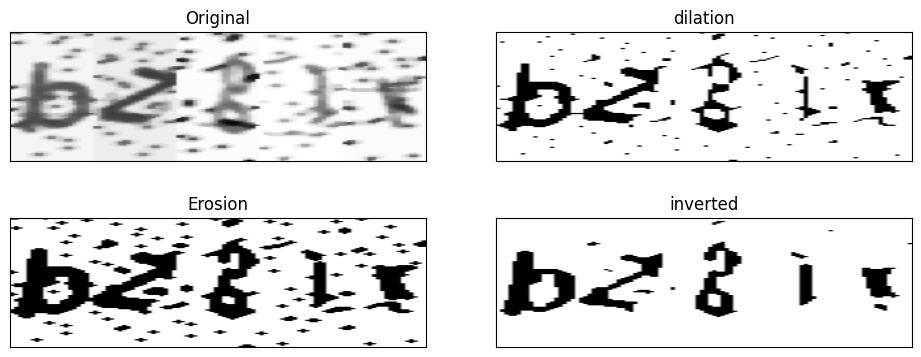

In [6]:
#gray image to work with 
median = cv2.medianBlur(images[6],3)
gray_image = cv2.cvtColor(median,cv2.COLOR_BGR2GRAY)

#inverted = cv2.bitwise_not(gray_image)

img = gray_image

#Thresholding
threshold = threshold_otsu(img) 
img_binary = img > threshold
#Adaptive mean Thresholding
#img_binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#Adaptive Gaussian Thresholding
#img_binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#Dilation
kernel = np.ones((2,2), np.uint8) #Remove circular noise
img_dilated = dilation(img_binary, kernel)

img_eroded = erosion(img_dilated) #To make it darker

kernel = np.ones((5,1), np.uint8) #Remove horizontal noise
img_dilated1 = dilation(img_eroded, kernel)


titles4 = ['Original', 'dilation', 'Erosion', 'inverted'] 
images4 = [img, img_dilated, img_eroded,img_dilated1]
# Plot the image to compare between the filters

fig, axs = plt.subplots(2, 2, figsize=(10, 4)) 
fig.tight_layout(pad=2.0)

for i in range(4):
  plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray', aspect='auto') 
  plt.title(titles4[i])
  plt.xticks([]), plt.yticks([])
  
plt.show()

Preprocessing all the images

In [7]:
pre_processed_images = []
for i in range(len(images)):
  img = images[i]
  
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #image contrast
  clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
  enhanced_image = clahe.apply(gray_image)
  
  threshold = threshold_otsu(enhanced_image) 
  img_binary = enhanced_image > threshold

  median = cv2.medianBlur(img, 3)
  #gauss = cv2.GaussianBlur(images[6], (3, 3), 0)

  #Dilation
  kernel = np.ones((2,1), np.uint8) #Remove noise
  img_dilated = dilation(img_binary, kernel)

  kernel = np.ones((2,2), np.uint8)
  img_eroded = erosion(img_dilated,kernel) #To make it darker

  kernel = np.ones((5,2), np.uint8) #Remove horizontal noise
  img_dilated1 = dilation(img_eroded, kernel)

  kernel = np.ones((5,1), np.uint8)
  img_eroded1 = erosion(img_dilated1,kernel) 

  pre_processed_images.append(img_eroded1)

Splitting the image on the basis of width

In [8]:
splitted_images = []
for i in range(len(pre_processed_images)):
  img = pre_processed_images[i]
  
  character_width = 20

    # Iterate over the width of the image to extract character images
  for i in range(5):
        # Calculate the starting and ending coordinates for each character
      start_x = i * character_width
      end_x = start_x + character_width

        # Extract the character image
      cropped_array = img[0:100, start_x:end_x]
      #character_image = img.crop((start_x, 0, end_x, height))

      splitted_images.append(cropped_array)

print(len(splitted_images))

5000


Now, after the pre-processing we have all 5000 images in splitted_images and all the other 5000 characters in image_characters

# Training the model with 3 mentioned classifiers


Splitting the dataset into training and validation set from these images

In [9]:
# Loading and storing the pre-processed images in the numpy array
X = np.array(splitted_images)  
y = np.array(image_characters)  

# Split the data into training and test sets, where test set is the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Reshaping the image data to be used further
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

Logistic Regression

In [10]:
# initialize the model
classifier = LogisticRegression()
logistic_regression = LogisticRegression(max_iter=2000) #Increasing iterations is not increasing the accuracy

# fit the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 62.50%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine

In [11]:
#SVM Classifier
svm_classifier = svm.SVC(gamma=0.01, C=100) 

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.00%


Random Forest

In [12]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.40%


#Question 1

The **SVM** classifier yielded the best accuracy on the validation set, with an accuracy of 83%. <br> <br>
Accuracy is a commonly used metric, but it may not be the best choice for all scenarios. 
<br> Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of the number of correct predictions to the total number of input samples.It works well only if there are an equal number of samples belonging to each class.<br> Accuracy = No of correct predictions ÷ Total no of predictions made <br> <br>

Other metrics like precision, recall, and F1 score can provide a more comprehensive evaluation. Precision focuses on minimizing false positives, recall emphasizes minimizing false negatives, and F1 score balances both precision and recall. So, it's important to consider these metrics alongside accuracy for a deeper understanding of algorithm performance.


# **Question 2** <br>
As from the above three, the best classifier we got is SVM. The hyperparameters which can be tweaked in it are the values of C (regularization parameter), Kernel and gamma (kernel Co-effecient).<br> <br>
Initially the accuracy was 75% but after running the below code we got the best accuracy as 83%. The respective parameters we got was C = 100 and gamma = 0.01, the higher value of C seems to work as it is more sensitive to individual data points and less tolerant of misclassifications. which can also lead to overfitting in some cases. A relatively smaller value of gamma indicates that the decision boundary will be smoother and it has a larger radius of influence. The kernel used yielding the best result is rbf.<br> <br>
As, the provided images has a lot of noise, the above parameters ensures a decision boundary that aims to closely fit the training data while still being relatively robust to noise or small variations.

In [13]:
C = [0.1, 1, 10, 100] #Increasing value of C increases accuracy
gamma =  [0.001, 0.01, 0.1, 1] #Gamma =0.01 gives best accuracy

#Checked for different parameters to find the Best Parameter
for a in C:
  for b in gamma:
    clf = svm.SVC(gamma=b, C=a)
    #fitting the classifier :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

0.244
0.109
0.039
0.039
0.683
0.813
0.039
0.039
0.76
0.83
0.04
0.039
0.746
0.83
0.04
0.039


# Question 3

Precision = True Positives / (True Positives + False Positives) <br>
Recall = True Positives / (True Positives + False Negatives) <br>
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)



LR 

In [14]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           a       0.72      0.72      0.72        36
           b       0.61      0.75      0.67        36
           c       0.69      0.69      0.69        39
           d       0.66      0.69      0.68        36
           e       0.60      0.62      0.61        34
           f       0.49      0.68      0.57        28
           g       0.80      0.63      0.71        38
           h       0.67      0.62      0.65        32
           i       0.63      0.63      0.63        43
           j       0.61      0.66      0.64        41
           k       0.66      0.72      0.69        43
           l       0.51      0.40      0.45        52
           m       0.42      0.57      0.48        37
           n       0.69      0.45      0.54        49
           o       0.73      0.61      0.67        44
           p       0.53      0.71      0.61        34
           q       0.79      0.68      0.73        44
           r       0.68    

SVM

In [15]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

#Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           a       0.82      0.89      0.85        36
           b       0.82      0.89      0.85        36
           c       0.92      0.85      0.88        39
           d       0.81      0.81      0.81        36
           e       0.90      0.79      0.84        34
           f       0.66      0.89      0.76        28
           g       0.91      0.79      0.85        38
           h       0.84      0.81      0.83        32
           i       0.68      0.84      0.75        43
           j       0.73      0.93      0.82        41
           k       0.91      0.91      0.91        43
           l       0.76      0.81      0.79        52
           m       0.82      0.86      0.84        37
           n       0.95      0.76      0.84        49
           o       0.94      0.73      0.82        44
           p       0.75      0.88      0.81        34
           q       0.97      0.77      0.86        44
           r       0.74    

Random Forrest

In [16]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           a       0.82      0.89      0.85        36
           b       0.70      0.89      0.78        36
           c       0.81      0.90      0.85        39
           d       0.87      0.75      0.81        36
           e       0.90      0.82      0.86        34
           f       0.69      0.89      0.78        28
           g       0.97      0.84      0.90        38
           h       0.85      0.72      0.78        32
           i       0.67      0.81      0.74        43
           j       0.63      0.98      0.77        41
           k       0.85      0.91      0.88        43
           l       0.79      0.73      0.76        52
           m       0.94      0.86      0.90        37
           n       0.94      0.69      0.80        49
           o       0.80      0.82      0.81        44
           p       0.78      0.85      0.82        34
           q       0.92      0.80      0.85        44
           r       0.76    

# Question 4

## A. <br>
Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
<br> There are 4 important terms :
*   True Positives : The cases in which we predicted YES and the actual output was also YES.
*   True Negatives : The cases in which we predicted NO and the actual output was NO.
*   False Positives : The cases in which we predicted YES and the actual output was NO.
*   False Negatives : The cases in which we predicted NO and the actual output was YES.
<br>Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal” i.e 
<p>
  Accuracy = <span>&#40;True postive + True negative &#41;</span> / Total sample
</p>
<br>
The confusion matrix using the best classifier is given below: 




In [17]:
y_pred = svm_classifier.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32  0  0  2  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0 32  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0]
 [ 0  0 33  0  0  0  0  0  1  0  0  0  0  0  0  0  0  4  0  1  0  0  0  0
   0  0]
 [ 0  3  0 29  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 3  0  0  0 27  2  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 25  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   1  0]
 [ 0  0  0  1  0  0 30  0  1  0  0  1  0  0  0  2  0  0  0  0  0  1  0  1
   1  0]
 [ 0  2  0  1  0  2  0 26  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  1  0  0 36  0  2  3  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0  0  0  1  0 38  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   1  0]
 [ 0  0  0  0  0  0  0  0  2  0 39  1  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  5  3  0 42  0  0  0  0  0  0  0  0  0  0  0  1
   1  0]
 [ 0

## B. <br>
 In different classifiers there are different characters with low accuracy. 

*   Logistic regression = V (low precision and recall)
*   SVM = V (low f1-score), F (low precision)
*   Random forest = F (low precision), N (low recall)

## C. <br>
For v, the number of dataset is less as compared to others.<br>
One of the main reasons for misclassification is visual similarity with other characters or their complex shape. 

*   Character like "v" can be visually similar to other character like "u" 
*   Characters like "f" can be visually similar to other characters like "y" or "r" 
*   Characters like "n" can be visually similar to other characters like "h" or "m" 








# **Question 5**
* Classifier = CNN, K-nearest neighbour, Ensemble Classifier                                     
We applied KNN since there are 26 boundaries and KNN performs well with multiple non-linear boundaries. 
* Filters = median filter, gaussian filter, box filter                  
Median filter works the best of all for OCR model. we almost got 2% increase in accuracy by just applying median filter
* Thresholding, adaptive mean threshold, adaptive gaussian threshold - There was no change in accuarcy 
* Contrast enhancement - Also 2% increase in accuracy by adjusting the contrast and brightness of the image 
* Data augmentation - Couldn't increase accuracy by rotating or shifting images
* We also tried bagging and boosting in the ensemble model to inc accuracy, rather it dec the accuracy by 1.1%

## CNN <br>
To increase accuracy we tried CNN, which gave us the best accuracy out of all the models, going up till 88.8%

In [18]:
# Convert the labels to numerical representation using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(image_characters)

#Splitted_images for CNN as the input size is different
splitted_images_cnn = []
for i in range(len(pre_processed_images)):
  img = pre_processed_images[i]
  
  character_width = 20

    # Iterate over the width of the image to extract character images
  for i in range(5):
        # Calculate the starting and ending coordinates for each character
      start_x = i * character_width
      end_x = start_x + character_width

        # Extract the character image
      cropped_array = img[0:100, start_x:end_x]
      #padded_image = np.pad(cropped_array, ((0, 0), (40, 40)), constant_values=255)
      resized_images = cropped_array.reshape(-1, 100, 20, 1)
      #normalized_images = resized_images/ 255.0

      splitted_images_cnn.append(resized_images)

#Concaneting to give correct dimensions
images_da = np.concatenate(splitted_images_cnn, axis=0)

# Split the data into training, validation and testing sets

X_train, X_test, y_train, y_test = train_test_split(images_da, encoded_labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(100,20,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu')) #Higher value of kernel size extracts overall feature 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50)) #Avoids overfitting
model.add(Dense(26, activation='softmax'))

# Compile the model with appropriate optimizer and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
110/110 [==============================] - 12s 95ms/step - loss: 2.7369 - accuracy: 0.2046 - val_loss: 1.6768 - val_accuracy: 0.5427
Epoch 2/40
110/110 [==============================] - 12s 111ms/step - loss: 1.5215 - accuracy: 0.5291 - val_loss: 0.9991 - val_accuracy: 0.7040
Epoch 3/40
110/110 [==============================] - 12s 111ms/step - loss: 1.1048 - accuracy: 0.6614 - val_loss: 0.7941 - val_accuracy: 0.7573
Epoch 4/40
110/110 [==============================] - 12s 113ms/step - loss: 0.8702 - accuracy: 0.7289 - val_loss: 0.7025 - val_accuracy: 0.7880
Epoch 5/40
110/110 [==============================] - 12s 112ms/step - loss: 0.7213 - accuracy: 0.7786 - val_loss: 0.6347 - val_accuracy: 0.8013
Epoch 6/40
110/110 [==============================] - 10s 92ms/step - loss: 0.6152 - accuracy: 0.8089 - val_loss: 0.6224 - val_accuracy: 0.8053
Epoch 7/40
110/110 [==============================] - 12s 110ms/step - loss: 0.5380 - accuracy: 0.8331 - val_loss: 0.5599 - val_accu

Accuracy for the CNN

In [19]:
# Use the trained model to predict labels for the test data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

24/24 [==============================] - 1s 22ms/step
Accuracy: 87.07%


## Training the model with other classifiers

Ensemble Classifier



In [20]:
# Loading and storing the pre-processed images in the numpy array
X = np.array(splitted_images)  
y = np.array(image_characters)  

# Split the data into training and test sets, where test set is the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Reshaping the image data to be used further
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Initialize the base models
logistic_regression = LogisticRegression(max_iter=500)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('lr', logistic_regression), ('dt', decision_tree), ('rf', random_forest), ('svm', svm), ('knn', knn)],
    voting='hard'  # Use majority voting for classification
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\n")
print("Accuracy: {:.2f}%".format(accuracy*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy: 80.70%


K-Nearest Neighbour

In [22]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.30%
